In [0]:
# Fill in your name using the format below and student ID number
your_name = "Minartz, Koen"
student_id = "1015414"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml 

In [0]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [0]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Koen, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
base_dir = '/content/drive/My Drive/google colab scripts/2IMM15 Assignment 3/assignment-3-kminartz' # For Google Colab
#base_dir = r"C:\Users\s161975\OneDrive - TU Eindhoven\Documents\1. uni\2019-2020\Q3\2IMM15\assignment-3-kminartz"

In [0]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/drive/My Drive/google colab scripts/2IMM15 Assignment 3/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

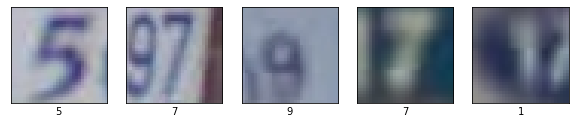

In [0]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json
from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras import optimizers
from tensorflow.keras.activations import relu
from tensorflow_addons.layers.maxout import Maxout #maxout activation function, generalization of relu (see Goodfellow, 2013)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
from random import choices
import cv2
from keras.applications.vgg16 import VGG16
!pip install lightgbm


def leaky_relu(x):
  return relu(x, 0.05)

def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    # if a json description is available, load config and then weights
    if os.path.isfile(os.path.join(base_dir, name+'.json')):
      json_file = open(os.path.join(base_dir, name+'.json'), 'r')
      loaded_model_json = json_file.read()
      json_file.close()
      model = model_from_json(loaded_model_json)
      model.load_weights(os.path.join(base_dir, name+extension))
    # else just load the entire model from hdf5 file
    else:
      model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  path = os.path.join(base_dir, name+extension)
  model.save(path)
  size = os.path.getsize(path)
  # If model > 100MB, store the weights and architecture only.
  if size > 100*1024*1024:
    print("Model larger than 100MB, storing weights only.")
    model.save_weights(path)
    model_json = model.to_json()
    with open(os.path.join(base_dir, name+".json"), "w") as json_file:
        json_file.write(model_json)

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233483  0.190844  2.233042      0.190974
max  2.245790  0.190970  2.233150      0.190974


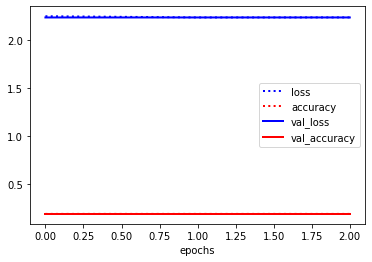

In [0]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233483  0.190844  2.233042      0.190974
max  2.245790  0.190970  2.233150      0.190974


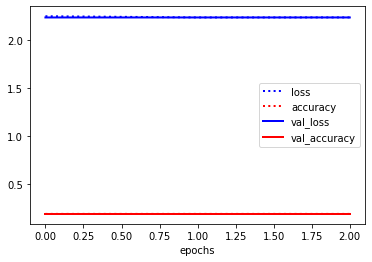

In [0]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3072)              9440256   
_________________________________________________________________
dense_5 (Dense)              (None, 1500)              4609500   
_________________________________________________________________
dense_6 (Dense)              (None, 750)               1125750   
_________________________________________________________________
dense_7 (Dense)              (None, 250)               187750    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2510      
Total params: 15,365,766
Trainable params: 15,365,766
Non-trainable params: 0
_________

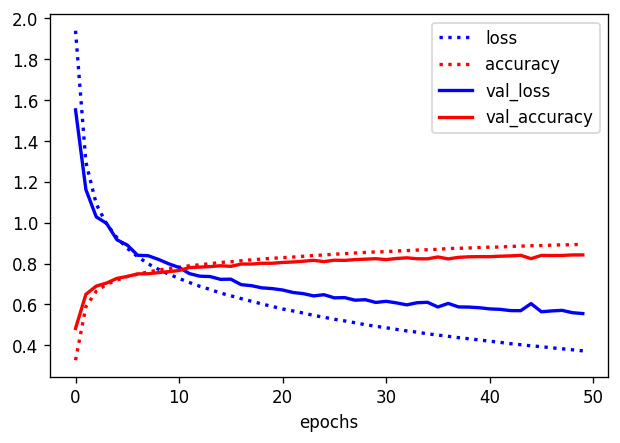

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.activations import relu
def leaky_relu(x):
  return relu(x, 0.05)
def build_model_1_1():
  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(3072, activation='relu'))
  model.add(layers.Dense(1500, activation='relu'))
  model.add(layers.Dense(750, activation='relu'))
  model.add(layers.Dense(250, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='Adagrad',   # optimizers.RMSprop(momentum=0.5, learning_rate=0.0005)
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=50)
answer_q_1_1 = "I chose 3072 nodes for the first hidden layer, as it is the length of one flattened image and as such we can capture many of the RGB-value interactions in this layer. I then added layers with half as many nodes iteratively until performance did not improve much anymore. Experimentation led to the choice of adagrad as an optimizer. For its simplicity (no preprocessing or regularization), the model's performance is good and stable and with 84.2% validation accuracy, it is a good baseline."
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

Loading model from file
Success!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 3072)              3148800   
_________________________________________________________________
dense_10 (Dense)             (None, 1500)              4609500   
_________________________________________________________________
dense_11 (Dense)             (None, 750)               1125750   
_________________________________________________________________
dense_12 (Dense)             (None, 250)               187750    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2510      
Total params: 9,074,310
Trainable params: 9,074,310
Non-trainable params: 0
___________

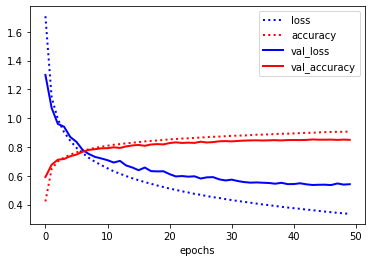

In [0]:
# best val acc: 85.2%

# Adjusted model
def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(3072, activation='relu'))
  model.add(layers.Dense(1500, activation='relu'))
  model.add(layers.Dense(750, activation='relu'))
  model.add(layers.Dense(250, activation= 'relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='Adagrad',     #  optimizers.RMSprop(momentum=0.5, learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=50)
answer_q_1_2 = "I used an identical model, with the only difference that now the images were converted to grayscale before training. This sped up the training process (less time per epoch) and resulted in a slightly better validation accuracy of 85.2%. So, even though the color values of the image are lost, roughly the same performance can be achieved, supporting the hypothesis that color is not important for classifying these images."
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_21 (Reshape)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_124 (Dense)            (None, 3072)              3148800   
_________________________________________________________________
dropout_32 (Dropout)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 3072)              12288     
_________________________________________________________________
dense_125 (Dense)            (None, 1500)              4609500   
_________________________________________________________________
dropout_33 (Dropout)

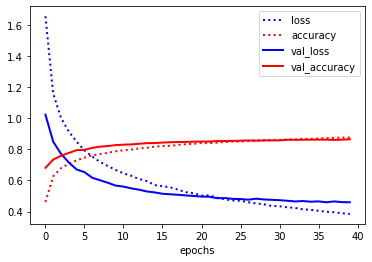

In [0]:
# best val acc: 0.857745
def build_model_1_3():
  model = models.Sequential()

  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(3072, activation='relu'))

  model.add(layers.Dropout(0.1))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(1500, activation='relu'))

  model.add(layers.Dropout(0.1))  
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(750, activation= 'relu'))

  model.add(layers.Dropout(0.1))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(250, activation='relu'))

  model.add(layers.Dropout(0.1))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer=optimizers.Adagrad(learning_rate=0.0015),       #  optimizers.RMSprop(momentum=0.5, learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=40, batch_size=50)
answer_q_1_3 = """After experimentation, it turns out that batch normalization and mild dropout works best. This is logical as the model did not overfit severely in the prior questions, and as such only mild regularization is necessary. Also, I increased the learning rate a bit for faster convergence. I also tested other activation functions, like elu and leaky relu, but this did not increase performance. The validation accuracy increased slightly to 86.6% and training time was reduced."""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_133 (Bat multiple                  4         
_________________________________________________________________
conv2d_76 (Conv2D)           multiple                  1000      
_________________________________________________________________
maxout_114 (Maxout)          multiple                  0         
_________________________________________________________________
batch_normalization_134 (Bat multiple                  200       
_________________________________________________________________
conv2d_77 (Conv2D)           multiple                  200160    
_________________________________________________________________
maxout_115 (Maxout)          multiple                  0         
_________________________________________________________________
max_pooling2d_57 (Ma

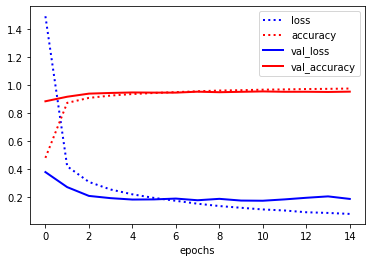

In [0]:

#maxout activation function: Goodfellow et al., 2013;  https://arxiv.org/abs/1302.4389

def build_model_2_1():
  model = models.Sequential()

  # model.add(layers.Convolution2D(filters=100, kernel_size=(2,2), padding='same'))
  # model.add(Maxout(num_units=50))

  model.add(layers.BatchNormalization(input_shape=(preprocessed_split[0][0].shape)))
  model.add(layers.Convolution2D(filters=100, kernel_size=(3,3), padding='same'))
  model.add(Maxout(num_units=50)) #maxout activation function, generalization of relu (see Goodfellow, 2013)

  model.add(layers.BatchNormalization())
  model.add(layers.Convolution2D(filters=160, kernel_size=(5,5), padding='same'))
  model.add(Maxout(num_units=40))#80
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Dropout(0.2))#0.4
  model.add(layers.BatchNormalization())
  model.add(layers.Convolution2D(filters=320, kernel_size=(7,7), padding='same'))
  model.add(Maxout(80))#160
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Dropout(0.25))#0.5
  model.add(layers.BatchNormalization())
  model.add(layers.Convolution2D(filters=640, kernel_size=(7,7), padding='same'))
  model.add(Maxout(80))#160
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Dropout(0.3))#0.3

  model.add(layers.Flatten())

  model.add(layers.BatchNormalization())
  model.add(layers.Dense(1000))
  model.add(Maxout(50))
  model.add(layers.Dropout(0.3))

  model.add(layers.BatchNormalization())
  model.add(layers.Dense(500))
  model.add(Maxout(50))
  

  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.RMSprop(momentum=0.5, learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, train=False, epochs=15, batch_size=50)

answer_q_2_1 = """The model performs well at 95.6% accuracy. I used 4 convolutional and 2 dense hidden layers. The convolutional layers start with small filter sizes to capture local patterns in the image, subsequently the filter sizes increase.
The convolutional layers use an increasing amount of filters, zero padding ('same') and maxpooling in between. We use the maxout activation function (Goodfellow et al., 2013); it takes the maximum over different weight sets multiplied with the input.
This keeps the number of filters/neurons per layer small (indicated in the maxout num_units) as each layer can have different weights for different inputs. It was shown to work well on this dataset.
We also used RMSprop as experimentation showed it worked better. Dropout rates were increased to prevent overfitting."""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 100)       1000      
_________________________________________________________________
maxout_6 (Maxout)            (None, 32, 32, 50)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 50)        200       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 160)       200160    
_________________________________________________________________
maxout_7 (Maxout)            (None, 32, 32, 40)        0         
_________________________________________________________________
max_pooling2d_3 (MaxP

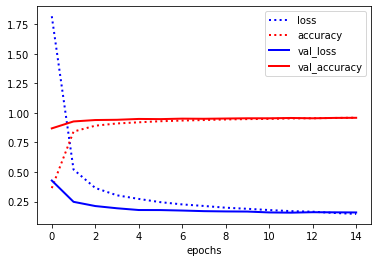

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data

"""
Epoch 15/15
1270/1270 [==============================] - 31s 24ms/step - loss: 0.1452 - accuracy: 0.9593 - val_loss: 0.1576 - val_accuracy: 0.9584
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(height_shift_range=0.1, width_shift_range=0.1, shear_range=0.1)
generator.fit(preprocessed_split[0])
it_train = generator.flow(preprocessed_split[0], preprocessed_split[2], batch_size=50)
augmented_split = (it_train, preprocessed_split[1], preprocessed_split[3])

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, epochs=15, batch_size=50, generator=True, steps_per_epoch=int(len(preprocessed_split[0])/50)) #0.9583 val acc
answer_q_2_2 = """I applied small height/width shifts and shear to the data, resulting in slightly better accuracy and no more overfitting. Shifting images too much could cause another number to be in the center and confuse the model. I tried rotation and brightness changes, but this did not improve performance. This is likely because the training set is a sufficiently large and diverse sample of the underlying distribution and modifying the images too much results in loss of information."""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

accuracy on the test set: 0.9576493101017223


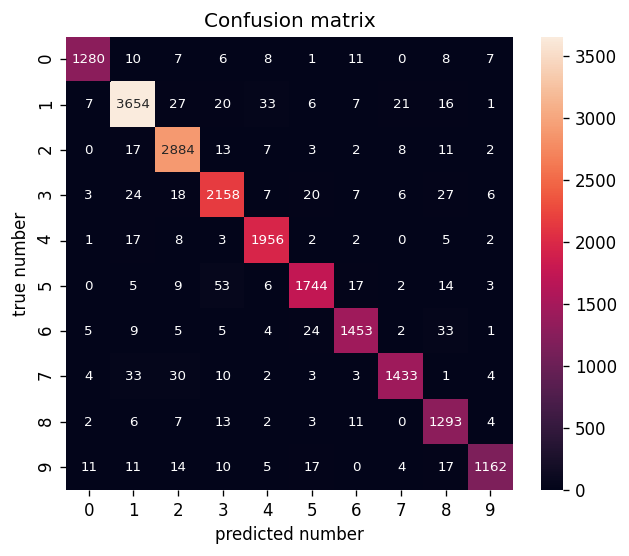

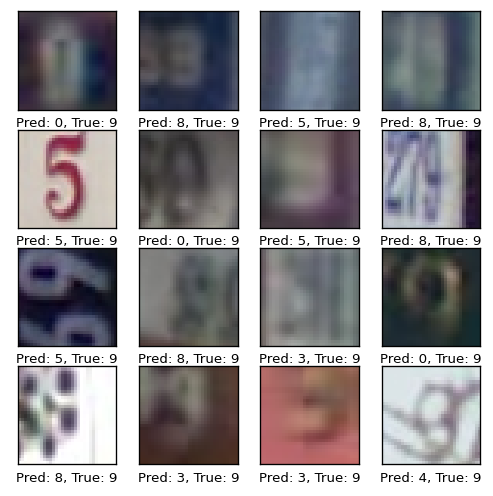

Answer is 457 characters long


In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from random import choices
import random

model_2_2 = load_model_from_file(base_dir, name='model_2_2')
X_test_preproc = rgb2gray(X_test)
preds=model_2_2.predict(X_test_preproc)

y_pred = (np.argmax(preds, axis=1)+1) % 10
y_true = (np.argmax(y_test, axis=1)+1) % 10
acc= (y_true == y_pred).mean()
print('accuracy on the test set:', acc)

test_accuracy_3_1 = acc #0.9564

def plot_confusion_matrix(y_true=y_true, y_pred=y_pred):
  conf_mat = confusion_matrix(y_true, y_pred, normalize=None)
  plt.figure(figsize=(6,5))

  sns.heatmap(conf_mat, annot=True, annot_kws={"fontsize":8}, fmt='g')
  plt.title('Confusion matrix')
  plt.ylabel('true number')
  plt.xlabel('predicted number')
  plt.show()
  return conf_mat

plot_confusion_matrix(y_true, y_pred)

def plot_misclassifications(X_test=X_test, y_true=y_true, y_pred=y_pred, true_label=9, grayscale=False, num_plots=16):

  if not true_label:
    true_label=randint(0,9)

  data = pd.DataFrame(data=np.transpose([y_true, y_pred]), columns=['y_true', 'y_pred'])
  data_missclassified = data.loc[(data.y_true == true_label) & (data.y_pred != data.y_true)]

  imgs = data_missclassified.sample(n=num_plots, random_state=123)

  fig, axes = plt.subplots(4, int(num_plots/4),  figsize=(6,6))
  for nr, i in enumerate(imgs.index):
      axes[nr//4, nr%4].imshow(X_test[i])
      axes[nr//4, nr%4].set_xlabel("Pred: %s, True: %s" % (data_missclassified.loc[i, 'y_pred'], data_missclassified.loc[i, 'y_true']), fontsize=8)
      axes[nr//4, nr%4].set_xticks(()), axes[nr//4, nr%4].set_yticks(())

  plt.show();



plot_misclassifications()


  
answer_q_3_1 = """In the confusion matrix, we see that 5 is relatively often confused with 3, 6 with 8, and 7 with 2 or 1. For the number 9, the model only gets 93% accuracy. Many misclassifications of 9 are explainable when looking at examples. Often, the number is unreadable to humans (me) due to low quality or noise. These mistakes are acceptable as humans are also likely to make them. Sometimes its 'true' label is even wrong (see the image of the red 5)."""
print("Answer is {} characters long".format(len(answer_q_3_1)))

In [0]:
#model_2_2.get_layer(index=0)

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?



 The label for this image is 8


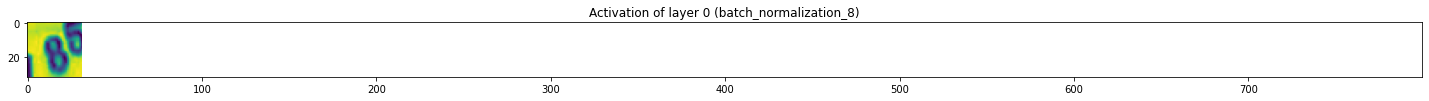

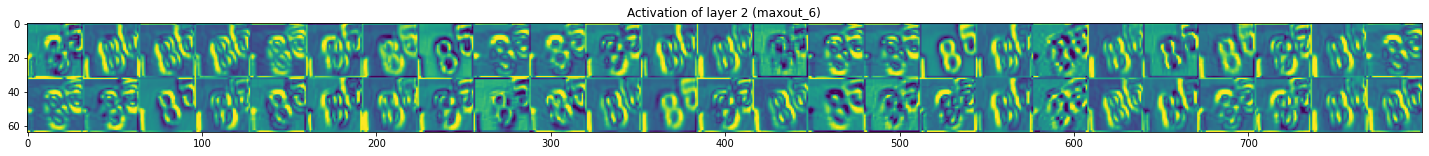

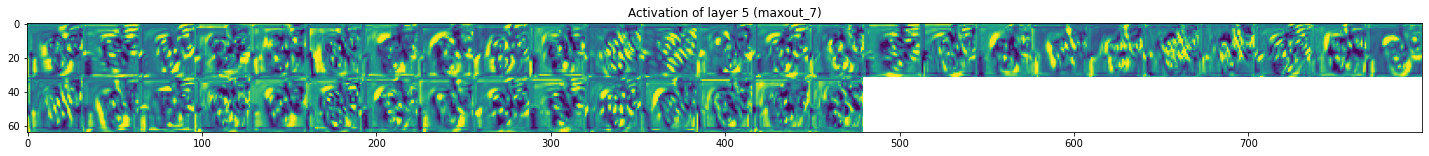

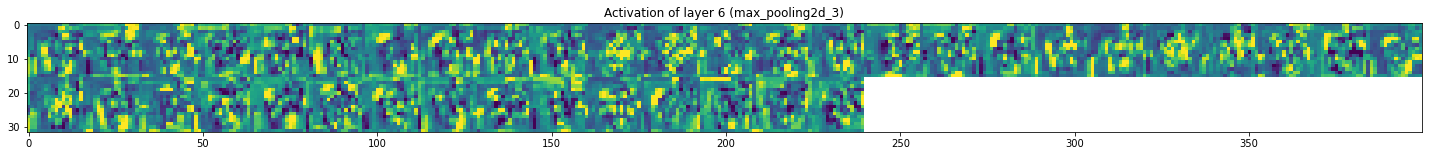

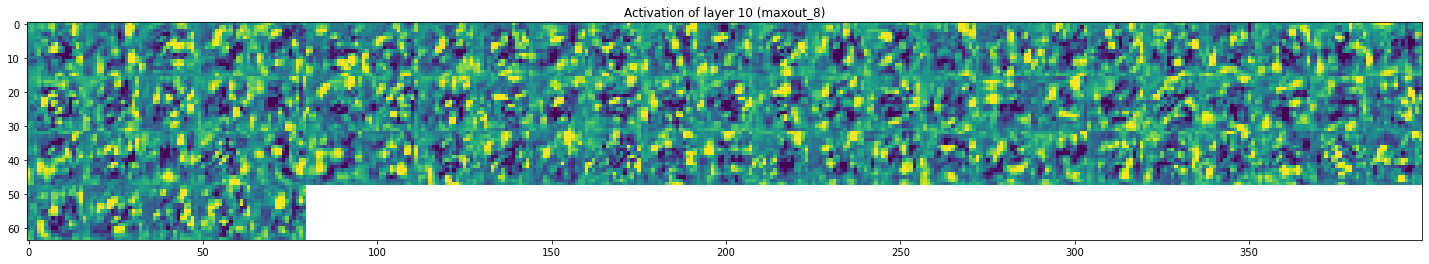

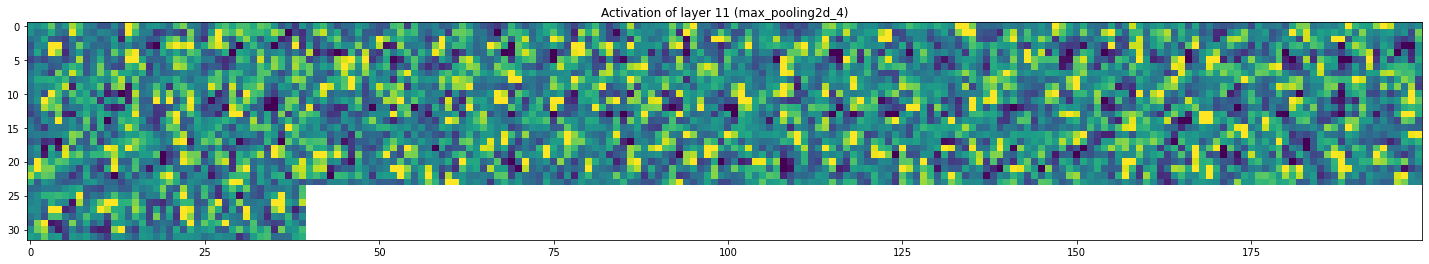

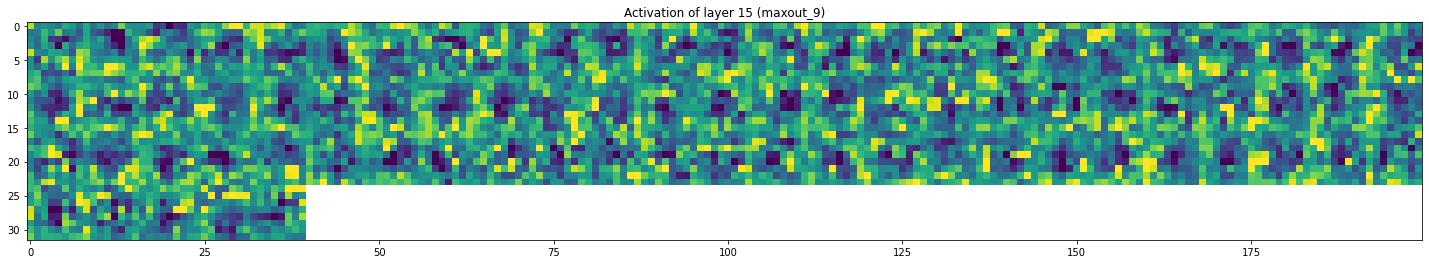

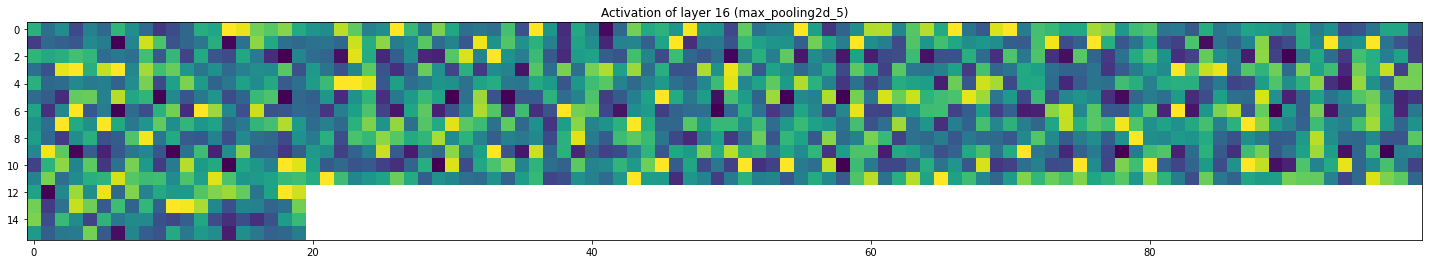

Answer is 490 characters long


In [0]:
X_test_preproc = rgb2gray(X_test)

#taken from lab 6 and adapted, e.g. to always show all filters (and not truncate if images_per_row is not a divider of n_features):

def plot_activations_of_layer(layer_index, activations, layer_names, images_per_row):
    start = layer_index
    end = layer_index+1
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start+1:end+1], activations[start:end]):
        # for first layer where there is only one feature dimension:

        if layer_activation.ndim < 4:
          layer_activation = np.expand_dims(layer_activation, -1)
        
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = int(np.ceil(n_features / images_per_row))
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        display_grid[:]=np.NaN

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(min(images_per_row, n_features-col*images_per_row)):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()



def plot_activations(image=X_test_preproc[0], layer_idx=[0, 2, 5, 6, 10, 11, 15, 16], model_name='model_2_2', dir=base_dir, label=y_true[0], images_per_row=25):
  #based on lab 6

  model=load_model_from_file(base_dir=dir, name=model_name)
  
  img_tensor = np.expand_dims(image, axis=0)
  layer_outputs = [layer.output for layer in model.layers]
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
  activations = activation_model.predict(img_tensor)
  #filter_counter = 0
  if label is not None:
    print('\n\n The label for this image is {}'.format(label))
  for i in layer_idx: #iterate over all activations (for each layer specified)
    id=i
    plot_activations_of_layer(layer_index=id, activations=activations,
                              layer_names=[activation_model.layers[k].name for k in range(len(activation_model.layers))],
                              images_per_row=images_per_row)
    # fig, axes = plt.subplots(1, len(filters[filter_counter]), figsize=(20,8))
    # fig.suptitle('activations for layer {} ({})'.format(i, model.layers[i].name))
    # for j, filter in enumerate(filters[filter_counter]): #iterate over all filters specified for this activation
    #   axes[j].imshow(activations[i][0,:, :, filter])
    #   axes[j].set_xlabel('filter {}'.format(filter))
    
    # plt.show()
    
    # filter_counter+=1


plot_activations()


answer_q_3_2 = """In the first convolutional layers (until layer 6), shapes resembling the 8 are visible. The first and second convolutional layers highlight mostly round edges at different angles. However, deeper in the net, the representation gets more abstract and it does not seem like the model makes abstractions in a way interpretable for humans. Note that due to the maxout activation function, there are almost no filters with all activations equal to 0, which can happen with relu (see e.g. lab 6)."""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

The model prediction is:  8


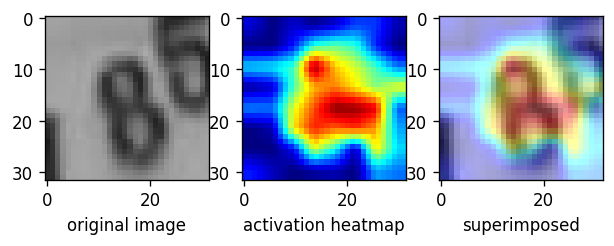

The model indeed focusses nicely on the center of the image for this example


In [0]:
from tensorflow.keras import backend as K
import tensorflow as tf
import cv2
def plot_activation_map(image_data=X_test_preproc, image_id=0, model_name='model_2_2', dir=base_dir, label=None, make_plot=True):
  #based on lecture 6 notebooks
  K.clear_session()
  tf.compat.v1.disable_eager_execution() #prevent bug

  #load model and predict output for image
  model=load_model_from_file(base_dir=dir, name=model_name) #has to be trained on sample of image_data distribution
  img_tensor = np.expand_dims(image_data[image_id], axis=0)


  model_pred = np.argmax(model.predict(img_tensor), axis=1)[0]
  pred = (model_pred + 1) % 10
  print('The model prediction is: ', pred) 
  model_output = model.output[:, model_pred]
  last_conv_layer = model.get_layer('maxout_9') #activation of last conv layer
  
  grads = tf.gradients(model_output, last_conv_layer.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img_tensor])
  for i in range(len(pooled_grads_value)):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  if make_plot:
      #(heatmap)
      plt.show()
      
  return heatmap


#plot_activation_map()
def plot_3_3(image_data=X_test_preproc, image_id=0, model_name='model_2_2', dir=base_dir, label=None):
  img=image_data[image_id]
  heatmap = plot_activation_map(image_data=image_data, image_id=image_id, model_name=model_name, dir=dir, label=label, make_plot=False)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  img = np.uint8(img*255)
  img = np.concatenate((img, img, img), axis=2)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
  superimposed_img = np.uint8(np.minimum(heatmap * 0.4 + img, 255))

  plt.rcParams['figure.dpi'] = 120
  fig, axes = plt.subplots(ncols=3)
  
  axes[2].imshow(superimposed_img)
  axes[2].set_xlabel('superimposed')
  axes[1].imshow(heatmap)
  axes[1].set_xlabel('activation heatmap')
  axes[0].imshow(img)
  axes[0].set_xlabel('original image')
  plt.show()

plot_3_3()
print('The model indeed focusses nicely on the center of the image for this example')

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Loading model from file
Success!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 12,984,330
Non-trainable params: 1,735,488
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.132837  0.758891  0.301793      0.863410
max  0.723977  0.963820  0.425226      0.913011
Answer is 480 characters long


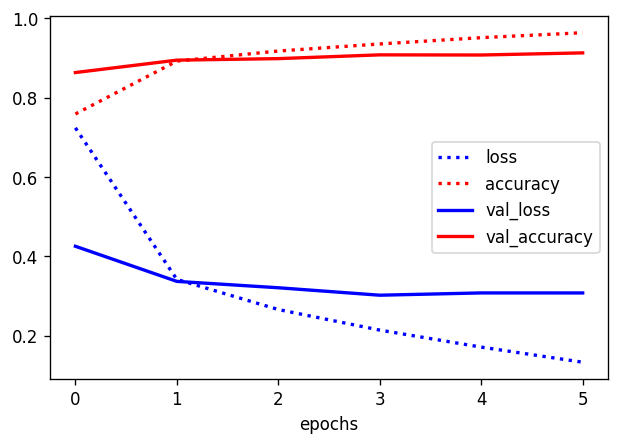

In [0]:
#preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val
#91.5
from tensorflow.keras.applications.vgg16 import VGG16

def build_model_4_1():
  conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(32, 32, 3))
  for layer in conv_base.layers:
    layer.trainable = False #freeze the convolutional base
  for layer in conv_base.layers[-8:]:
    layer.trainable=True #tune by training the last 2 blocks of conv layers
  model=models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())


  model.add(layers.Dense(10, activation='softmax')) #to evaluate the tuning
  model.compile(optimizer='Adagrad', # optimizers.RMSprop(momentum=0.5, learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model
  



run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=6, batch_size=50)
answer_q_4_1 = """By tuning the last two convolutional blocks we get 91.3% validation accuracy in only 6 training epochs, taking a few minutes, which is about 4.5% less than that of model_2_2. If we tune for more epochs, the model is susceptible to overfitting, due to the lack of regularization in the convolutional base. Unfreezing more layers can result in higher accuracy, but then we're bassically retraining the entire network instead of tuning, while unfreezing less layers reduces accuracy."""
print("Answer is {} characters long".format(len(answer_q_4_1)))

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(32, 32, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [0]:
#0.9122 test
import pickle
import gzip
from sklearn import pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  complete_model = load_model_from_file(base_dir=base_dir, name="model_4_1")
  model=models.Sequential()
  for l in complete_model.layers[:-1]: # exclude the dense layer
    model.add(l)
  embeddings_train = model.predict(X_train)
  print(f'train embeddings created. shape: {embeddings_train.shape}')
  embeddings_val = model.predict(X_val)
  print(f'val embeddings created. shape: {embeddings_val.shape}')
  embeddings_test = model.predict(X_test)
  print(f'test embeddings created. shape: {embeddings_test.shape}')
  store_embedding(embeddings_train, name='train_set')
  print('train embeddings stored')
  store_embedding(embeddings_val, name='val_set')
  print('val embeddings stored')
  store_embedding(embeddings_test, name='test_set')
  print('test embeddings stored')
  print('all done!')


def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  scaler = StandardScaler()
  svc = SVC(C=0.1)
  rfc = RFC(n_estimators = 500, n_jobs=-1)
  lgbm = LGBMClassifier(n_jobs=-1, max_depth=3, n_estimators = 500, feature_fraction=0.7, bagging_freq=20, bagging_fraction=0.7, learning_rate=0.05, num_leaves=31)
  pca = PCA(n_components = 0.9)
  pipe = pipeline.Pipeline(steps=[('scaling', scaler), ('pca', pca), ('classification', lgbm)], )
  return pipe

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  val_embed = load_embedding('val_set')
  y_val_labels = (np.argmax(y_val, axis=1)+1)%10
  pipeline.fit(X_train, y_train) #, classification__eval_set=(val_embed, y_val_labels), classification__early_stopping_rounds=100
  preds = pipeline.predict(X_test)
  preds = np.array(preds)
  train_preds = pipeline.predict(X_train)
  print(f'training accuracy: {np.mean(train_preds == np.array(y_train))}')
  #print(preds)
  
  acc = np.mean(preds == np.array(y_test))
  return acc

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  train_embed = load_embedding('train_set')
  val_embed = load_embedding('val_set')
  test_embed = load_embedding('test_set')
  y_train_labels = (np.argmax(y_train, axis=1)+1)%10
  y_val_labels = (np.argmax(y_val, axis=1)+1)%10
  y_test_labels = (np.argmax(y_test, axis=1)+1)%10
  pipe = generate_pipeline()
  acc = evaluate_pipeline(pipe, train_embed, y_train_labels, test_embed, y_test_labels)
  return acc

#store_embeddings()


acc = evaluation_4_2(X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)
print(f"accuracy on test set: {acc}")
answer_q_4_2 = """After experiments, many parameter combinations resulted in roughly the same accuracy and lgbm's bagging and feature sampling turned out to be most important. The difference between training and validation accuracy is significant, as the embeddings are created based on the training set and lgbm can overfit quickly. However, regularizing lgbm more led to lower validation accuracy, so I kept it this way. The test accuracy is about 4.5% lower than that of model_2_2 and similar to model_4_1."""
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))


training accuracy: 0.9891728566032985
accuracy on test set: 0.9116225198912277
Pipeline: Pipeline(memory=None,
         steps=[('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.9,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classification',
                 LGBMClassifier(bagging_fraction=0.7, bagging_freq=20,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.7,
                                importance_type='split', learning_rate=0.05,
                                max_depth=3, min_child_samples=20,
                                min_child_weight=0.001, min_split_gain=0.0,
                                n_estimators=500, n_jobs=-1, num_leaves=31,
                                

401